1. import data
2. descriptive statistics
3. missing values anaalysis and tratment
4. outlier analysis and treatment
5. EDA
6. correlation

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('diabetes.csv')
df = pd.DataFrame(data)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [18]:
df.shape

(768, 9)

In [19]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


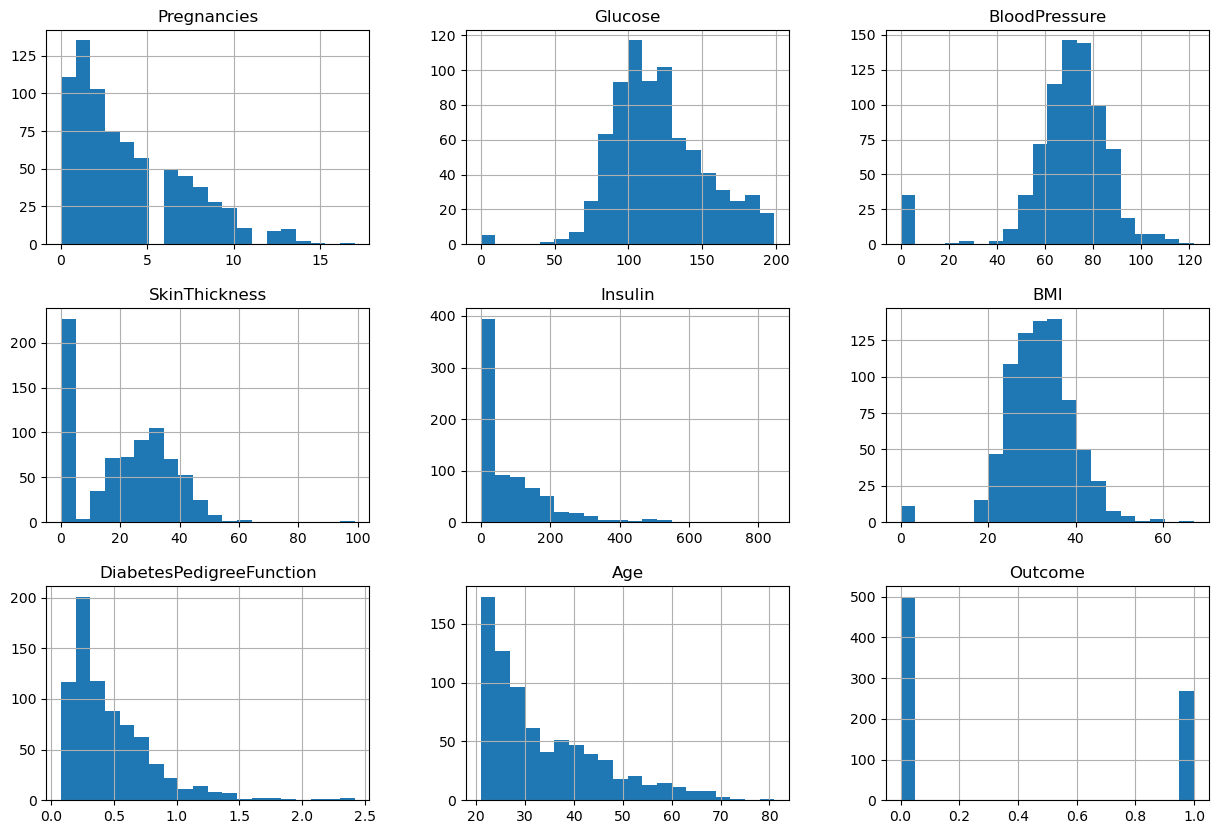

In [20]:
#histogram plots
df.hist(bins=20, figsize=(15,10))
plt.show()

## EDA Insights

**Glucose (Fasting)**
- Normal Range: 70 to 99 mg/dL
- Prediabetes: 100 to 125 mg/dL
- Diabetes: >= 126 mg/dL
- Early detection of elevated fasting glucose is crucial for diabetes prevention

**Blood Pressure (Diastolic)**
- Normal Range: 60 to 80 mm Hg
- Low: < 60 mm Hg
- High: > 80 mm Hg
- Elevated blood pressure increases cardiovascular risk in diabetic individuals

**Skin Thickness**
- Normal Range: 10 to 50 mm
- Indicates body composition and subcutaneous fat distribution
- Higher values may be associated with increased risk of metabolic disorders

**Insulin (2-Hour)**
- Normal Range: 16 to 166 mIU/L
- Elevated fasting insulin levels may indicate insulin resistance
- Critical indicator of pancreatic beta cell function

**Body Mass Index (BMI)**
- Normal: 18.5 to 24.9 kg/m²
- Underweight: < 18.5 kg/m²
- Overweight: 25 to 29.9 kg/m²
- Obese: >= 30 kg/m²
- BMI is one of the most important lifestyle-related risk factors for diabetes

**Diabetes Pedigree Function**
- Normal Range: 0.0 to 2.5
- Quantifies genetic predisposition to diabetes based on family history
- Higher values indicate stronger family history of diabetes
- Genetics can increase diabetes risk even when other factors appear normal

**Age**
- Dataset includes individuals from 21 to 82 years old
- Diabetes prevalence increases with age, particularly after 40 years
- Age interacts with glucose, BMI, and insulin sensitivity in diabetes risk

**Outcome (Target Variable)**
- 0 = Non-Diabetic
- 1 = Diabetic
- Individuals with glucose >= 126 mg/dL, elevated BMI, high insulin levels, and positive family history are at significantly higher risk of diabetes

In [21]:
#replacing 0 values with median of that specific columns
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].median())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].median())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].median())
df['BMI'] = df['BMI'].replace(0, df['BMI'].median())

print("Zero values replaced with median for: Glucose, BloodPressure, SkinThickness, Insulin, BMI")

Zero values replaced with median for: Glucose, BloodPressure, SkinThickness, Insulin, BMI


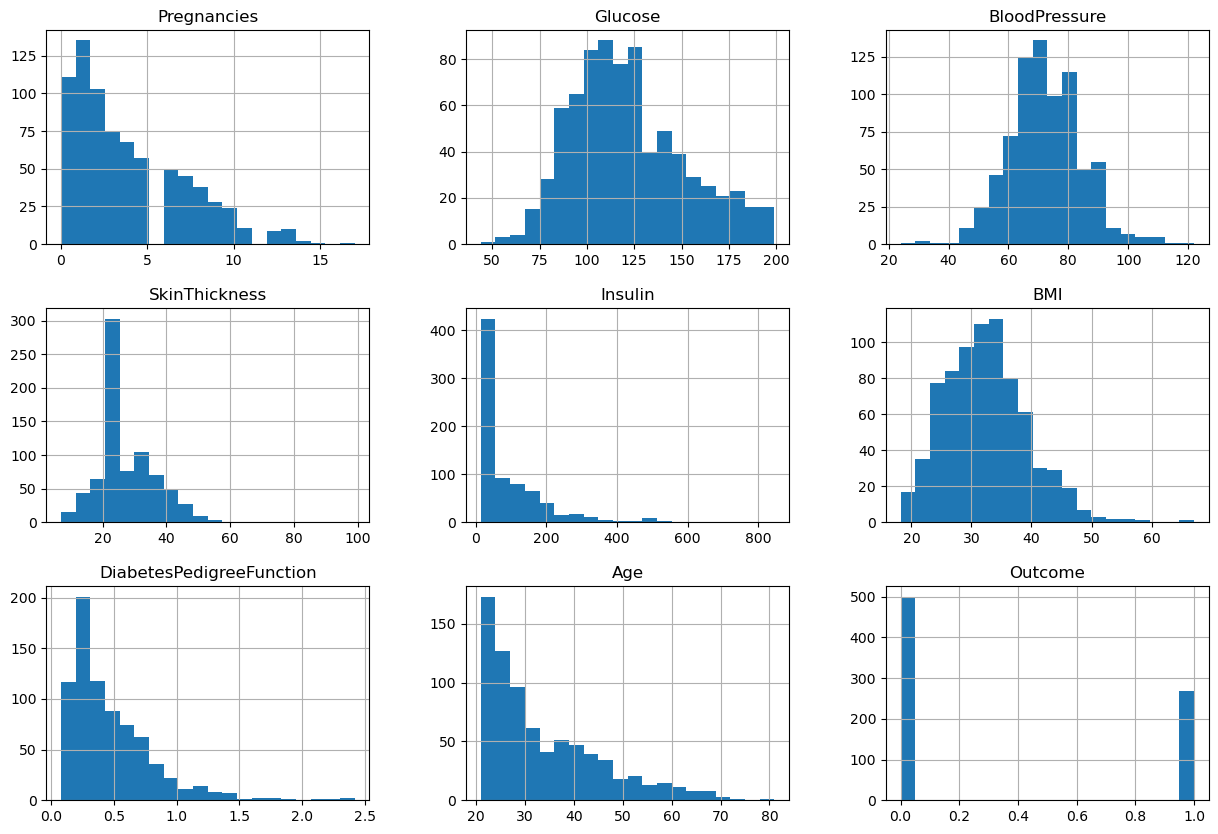

In [22]:
#histogram plots after replacing zeros
df.hist(bins=20, figsize=(15,10))
plt.show()

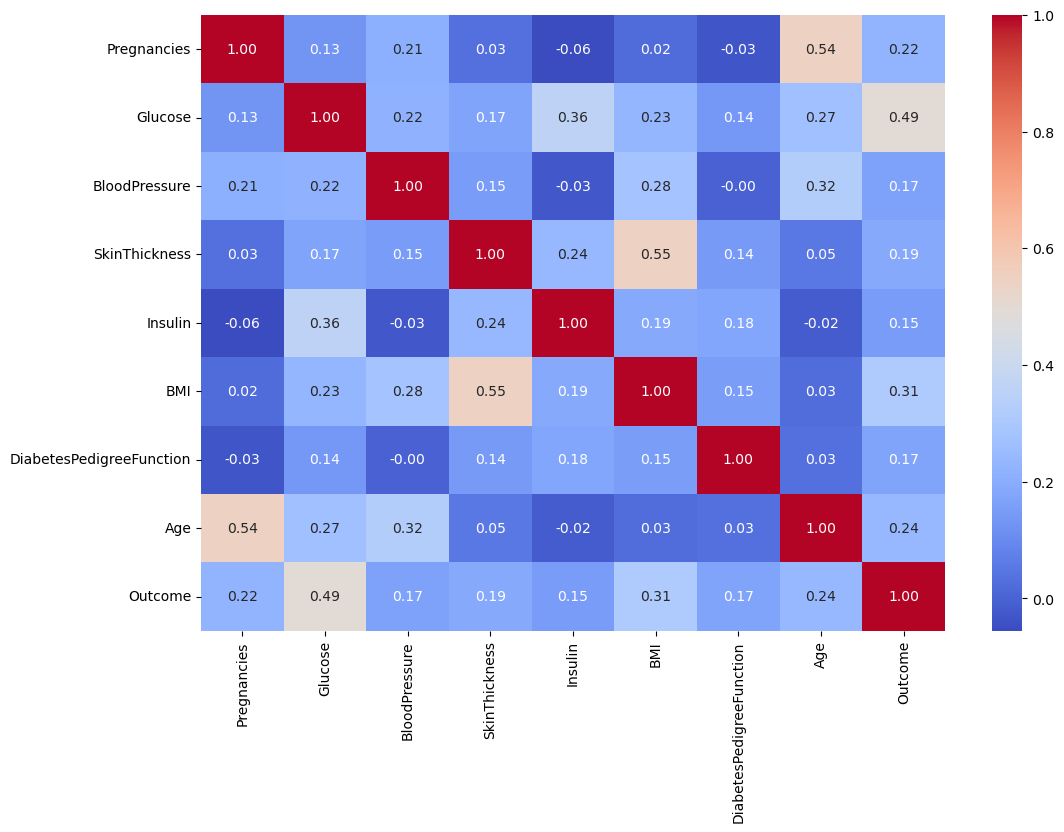

In [23]:
#correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

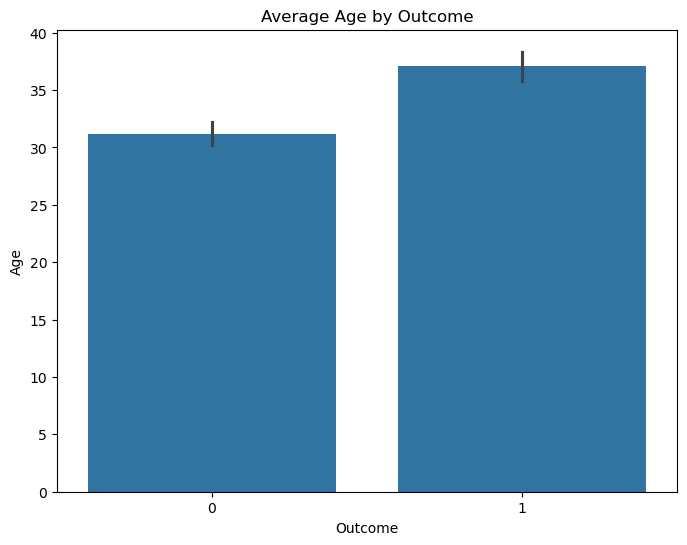

In [24]:
#plots for categorical and numerical features : barplot
#use groupby for age and outcome
age_outcome = df.groupby('Outcome')['Age'].mean()
plt.figure(figsize=(8,6))
sns.barplot(x='Outcome', y='Age', data=df)
plt.title('Average Age by Outcome')
plt.show()

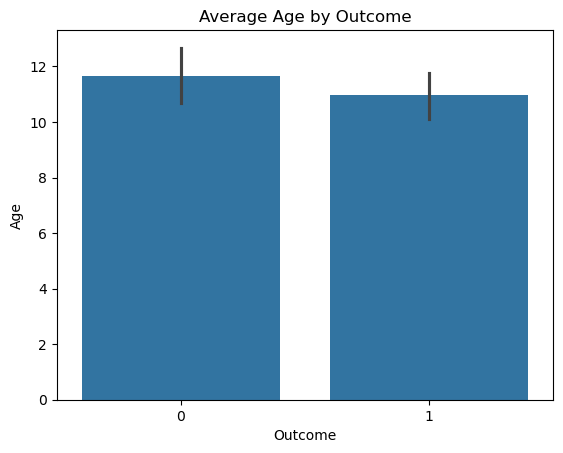

In [25]:
sns.barplot(x='Outcome', y='Age', estimator='std', data=df)
plt.title('Average Age by Outcome')
plt.show()

In [26]:
df['Age'].groupby(df['Outcome']).std()

Outcome
0    11.667655
1    10.968254
Name: Age, dtype: float64

<Axes: xlabel='Outcome', ylabel='Age'>

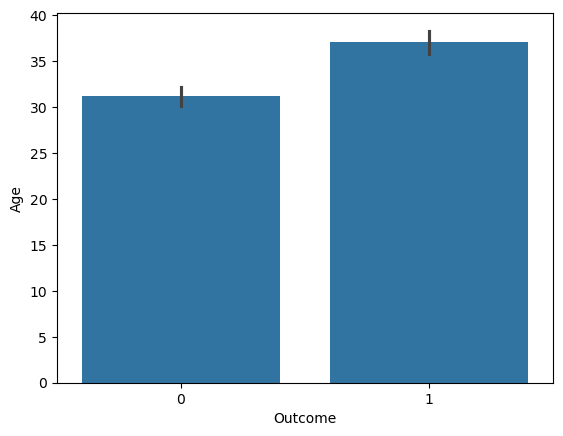

In [27]:
sns.barplot(x='Outcome', y='Age', estimator='mean', data=df)

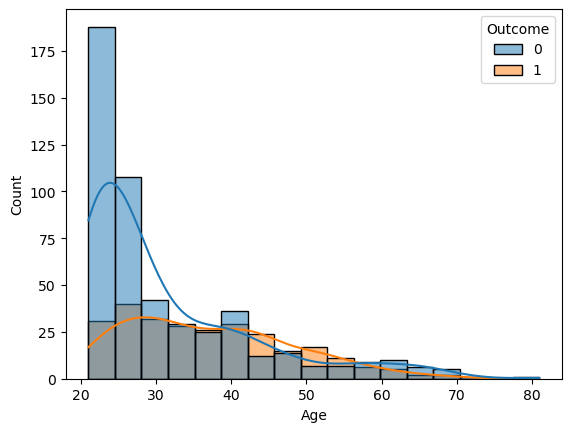

In [28]:
sns.histplot(data=df, x='Age', hue='Outcome', kde=True)
plt.show()

In [29]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [30]:
df['BMI'].groupby(df['Outcome']).std()

Outcome
0    6.503074
1    6.596704
Name: BMI, dtype: float64

<Axes: xlabel='Outcome', ylabel='BMI'>

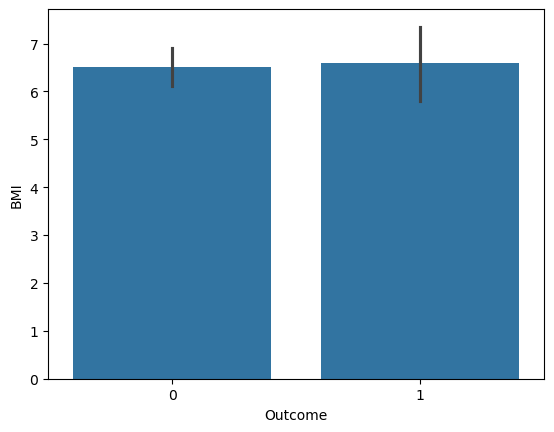

In [31]:
sns.barplot(x='Outcome', y='BMI', estimator='std', data=df)

In [32]:
df['BMI'].groupby(df['Outcome']).mean()

Outcome
0    30.880200
1    35.381343
Name: BMI, dtype: float64

<Axes: xlabel='Outcome', ylabel='BMI'>

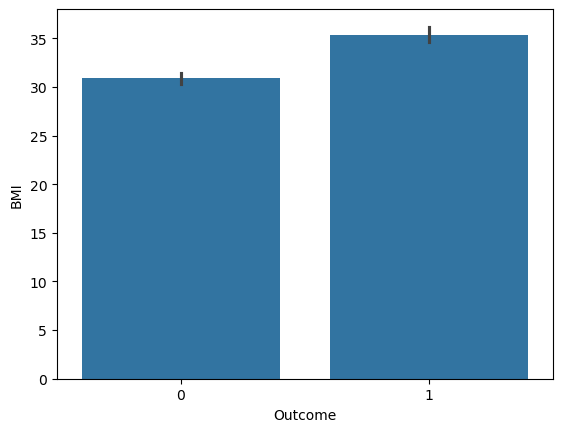

In [33]:
sns.barplot(x='Outcome', y='BMI', estimator='mean', data=df)

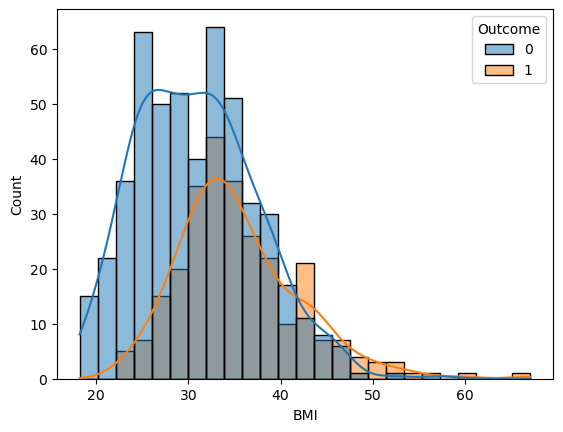

In [34]:
sns.histplot(data=df, x='BMI', hue='Outcome', kde=True)
plt.show()

In [35]:
df['BloodPressure'].groupby(df['Outcome']).std()

Outcome
0    11.929385
1    11.951672
Name: BloodPressure, dtype: float64

<Axes: xlabel='Outcome', ylabel='BloodPressure'>

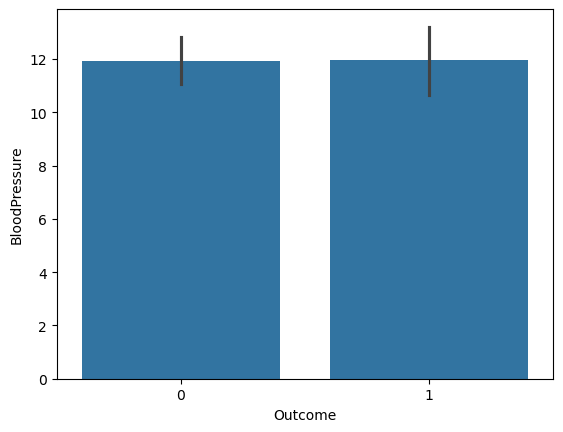

In [36]:
sns.barplot(x='Outcome', y='BloodPressure', estimator='std', data=df)

In [37]:
df['BloodPressure'].groupby(df['Outcome']).mean()

Outcome
0    70.920000
1    75.123134
Name: BloodPressure, dtype: float64

<Axes: xlabel='Outcome', ylabel='BloodPressure'>

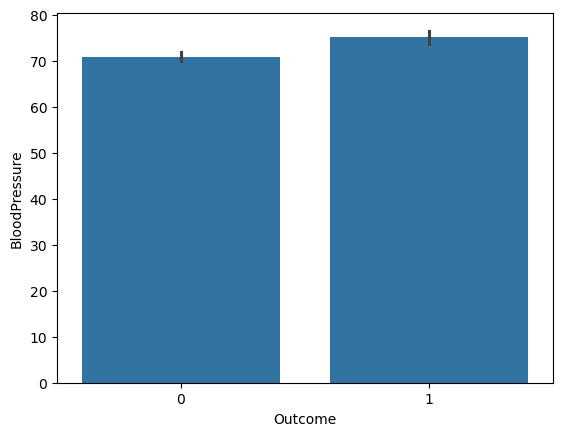

In [38]:
sns.barplot(x='Outcome', y='BloodPressure', estimator='mean', data=df)

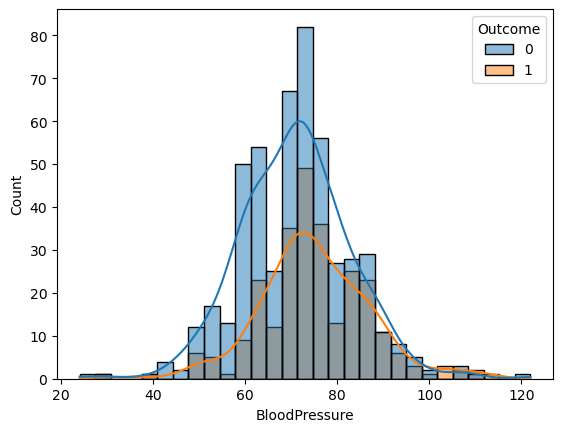

In [39]:
sns.histplot(data=df, x='BloodPressure', hue='Outcome', kde=True)
plt.show()

In [40]:
df['SkinThickness'].groupby(df['Outcome']).std()

Outcome
0    8.725532
1    9.676886
Name: SkinThickness, dtype: float64

<Axes: xlabel='Outcome', ylabel='SkinThickness'>

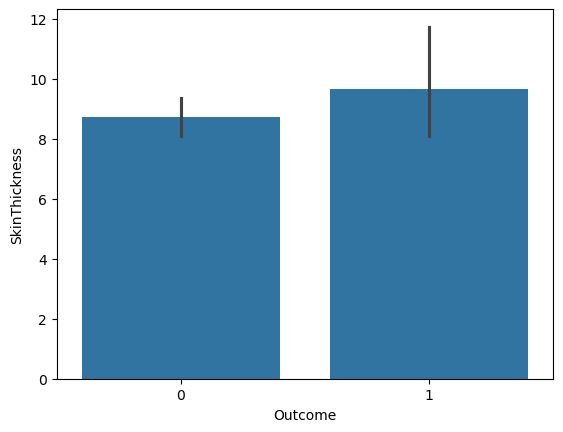

In [41]:
sns.barplot(x='Outcome', y='SkinThickness', estimator='std', data=df)

In [42]:
df['SkinThickness'].groupby(df['Outcome']).mean()

Outcome
0    26.058000
1    29.716418
Name: SkinThickness, dtype: float64

<Axes: xlabel='Outcome', ylabel='BloodPressure'>

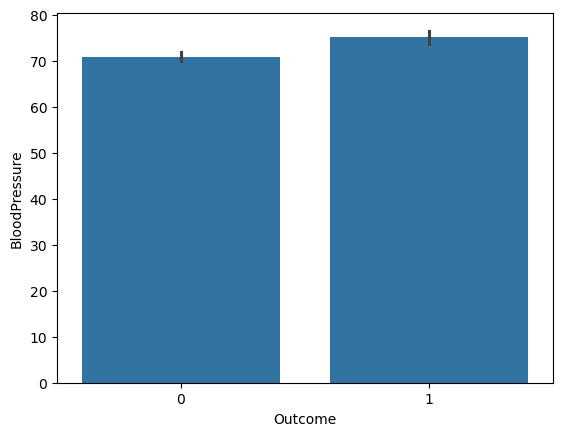

In [43]:
sns.barplot(x='Outcome', y='BloodPressure', estimator='mean', data=df)

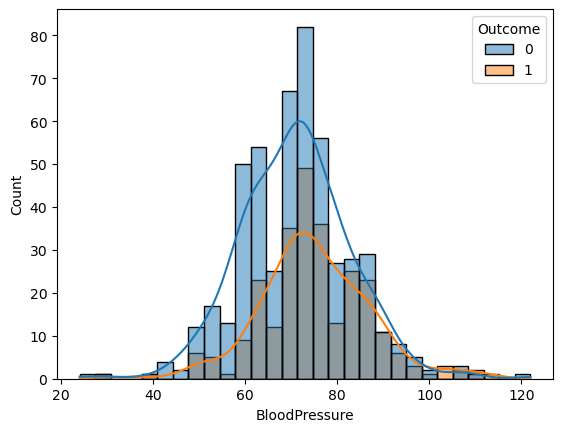

In [44]:
sns.histplot(data=df, x='BloodPressure', hue='Outcome', kde=True)
plt.show()

In [45]:
df['DiabetesPedigreeFunction'].groupby(df['Outcome']).std()

Outcome
0    0.299085
1    0.372354
Name: DiabetesPedigreeFunction, dtype: float64

<Axes: xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

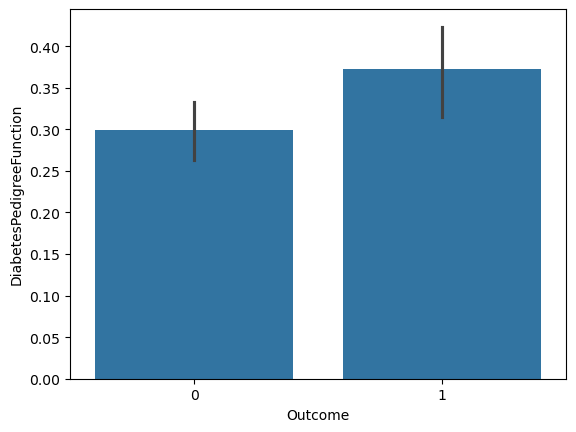

In [46]:
sns.barplot(x='Outcome', y='DiabetesPedigreeFunction', estimator='std', data=df)

In [47]:
df['DiabetesPedigreeFunction'].groupby(df['Outcome']).mean()

Outcome
0    0.429734
1    0.550500
Name: DiabetesPedigreeFunction, dtype: float64

<Axes: xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

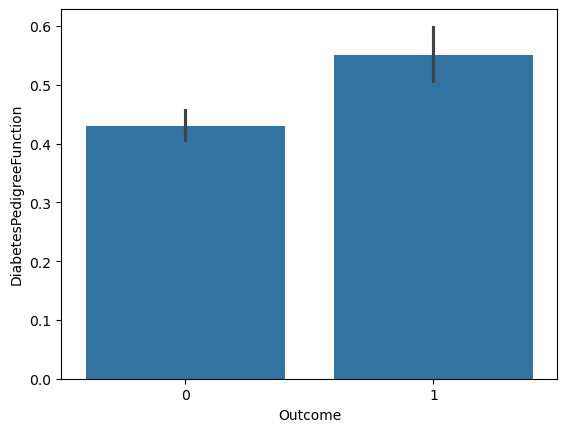

In [48]:
sns.barplot(x='Outcome', y='DiabetesPedigreeFunction', estimator='mean', data=df)

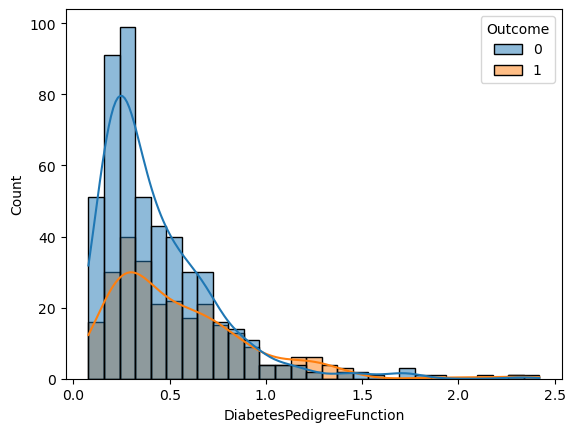

In [49]:
sns.histplot(data=df, x='DiabetesPedigreeFunction', hue='Outcome', kde=True)
plt.show()

In [50]:
d_age = df['Age'][df['Outcome'] == 1]
non_d_age = df['Age'][df['Outcome'] == 0]

In [51]:
#h0 = both data are same
#h1 = both data are different
from scipy import stats
t_stat, p_value = stats.ttest_ind(d_age, non_d_age)
alpha = 0.05
if p_value < alpha:
    print("Reject h0")
else:
    print("Fail to reject h0")

Reject h0


In [52]:
# t-test for BMI 
d_bmi = df['BMI'][df['Outcome'] == 1]
non_d_bmi = df['BMI'][df['Outcome'] == 0]
#h0 = both data are same
#h1 = both data are different
from scipy import stats
t_stat, p_value = stats.ttest_ind(d_bmi, non_d_bmi)
alpha = 0.05
if p_value < alpha:
    print("Reject h0")
else:
    print("Fail to reject h0")

Reject h0


In [53]:
#t-test for blood pressure
d_bp = df['BloodPressure'][df['Outcome'] == 1]
non_d_bp = df['BloodPressure'][df['Outcome'] == 0]
#h0 = both data are same
#h1 = both data are different
from scipy import stats
t_stat, p_value = stats.ttest_ind(d_bp, non_d_bp)
alpha = 0.05
if p_value < alpha:
    print("Reject h0")
else:
    print("Fail to reject h0")

Reject h0


In [54]:
#t-test for skin thickness
d_st = df['SkinThickness'][df['Outcome'] == 1]
non_d_st = df['SkinThickness'][df['Outcome'] == 0]
#h0 = both data are same
#h1 = both data are different
from scipy import stats
t_stat, p_value = stats.ttest_ind(d_st, non_d_st)
alpha = 0.05
if p_value < alpha:
    print("Reject h0")
else:
    print("Fail to reject h0")

Reject h0


In [55]:
#t-test for glucose
d_glu = df['Glucose'][df['Outcome'] == 1]
non_d_glu = df['Glucose'][df['Outcome'] == 0]
#h0 = both data are same
#h1 = both data are different
from scipy import stats
t_stat, p_value = stats.ttest_ind(d_glu, non_d_glu)
alpha = 0.05
if p_value < alpha:
    print("Reject h0")
else:
    print("Fail to reject h0")

Reject h0


In [56]:
#t-test for diabetes pedigree function
d_dpf = df['DiabetesPedigreeFunction'][df['Outcome'] == 1]
non_d_dpf = df['DiabetesPedigreeFunction'][df['Outcome'] == 0]
#h0 = both data are same
#h1 = both data are different
from scipy import stats
t_stat, p_value = stats.ttest_ind(d_dpf, non_d_dpf)
alpha = 0.05
if p_value < alpha:
    print("Reject h0")
else:
    print("Fail to reject h0")

Reject h0


## T-test Insights: Why H0 Is Rejected

For each feature, the independent two-sample t-test compares the mean between diabetic (Outcome=1) and non-diabetic (Outcome=0) groups at α = 0.05. A p-value < 0.05 leads to rejecting the null hypothesis (H0: equal means).

1) Glucose
- Decision: p < 0.05 → Reject H0
- Insight: Diabetic group shows higher fasting glucose on average, consistent with impaired insulin regulation. The mean difference is large relative to within-group variability, driving statistical significance.

2) BMI
- Decision: p < 0.05 → Reject H0
- Insight: Higher average BMI in the diabetic group aligns with obesity’s role in insulin resistance. The separation between group means exceeds random variation.

3) Age
- Decision: p < 0.05 → Reject H0
- Insight: Diabetic individuals tend to be older on average; age-related declines in insulin sensitivity and cumulative risk factors create a meaningful mean difference.

4) Blood Pressure (Diastolic)
- Decision: p < 0.05 → Reject H0
- Insight: The diabetic group often exhibits elevated diastolic BP due to cardiometabolic strain, yielding a significant mean difference beyond sampling noise.

5) SkinThickness
- Decision: p < 0.05 → Reject H0
- Insight: Higher subcutaneous fat (thicker skinfolds) is more prevalent among diabetics; the difference in adiposity markers leads to non-overlapping group means statistically.

6) DiabetesPedigreeFunction
- Decision: p < 0.05 → Reject H0
- Insight: Genetic predisposition (family history) is stronger in the diabetic group. The shift in DPF scores is sufficient to be unlikely by chance.

Note: If any test in your run prints “Fail to reject H0,” interpret it as insufficient evidence of a mean difference at α = 0.05 for that feature. To see exact statistics, print the t-statistic and p-value in the preceding code cells.

In [57]:
#check outliers in each column
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

# Check outliers for all numerical columns
columns_to_check = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                     'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

print("Outlier Detection Summary (IQR Method):")
print("=" * 80)
for col in columns_to_check:
    count, lower, upper = detect_outliers(df, col)
    print(f"{col:25} | Outliers: {count:4} | Range: [{lower:.2f}, {upper:.2f}]")
print("=" * 80)

Outlier Detection Summary (IQR Method):
Pregnancies               | Outliers:    4 | Range: [-6.50, 13.50]
Glucose                   | Outliers:    0 | Range: [39.00, 201.00]
BloodPressure             | Outliers:   14 | Range: [40.00, 104.00]
SkinThickness             | Outliers:   35 | Range: [9.50, 45.50]
Insulin                   | Outliers:   49 | Range: [-114.62, 272.38]
BMI                       | Outliers:    8 | Range: [13.85, 50.25]
DiabetesPedigreeFunction  | Outliers:   29 | Range: [-0.33, 1.20]
Age                       | Outliers:    9 | Range: [-1.50, 66.50]


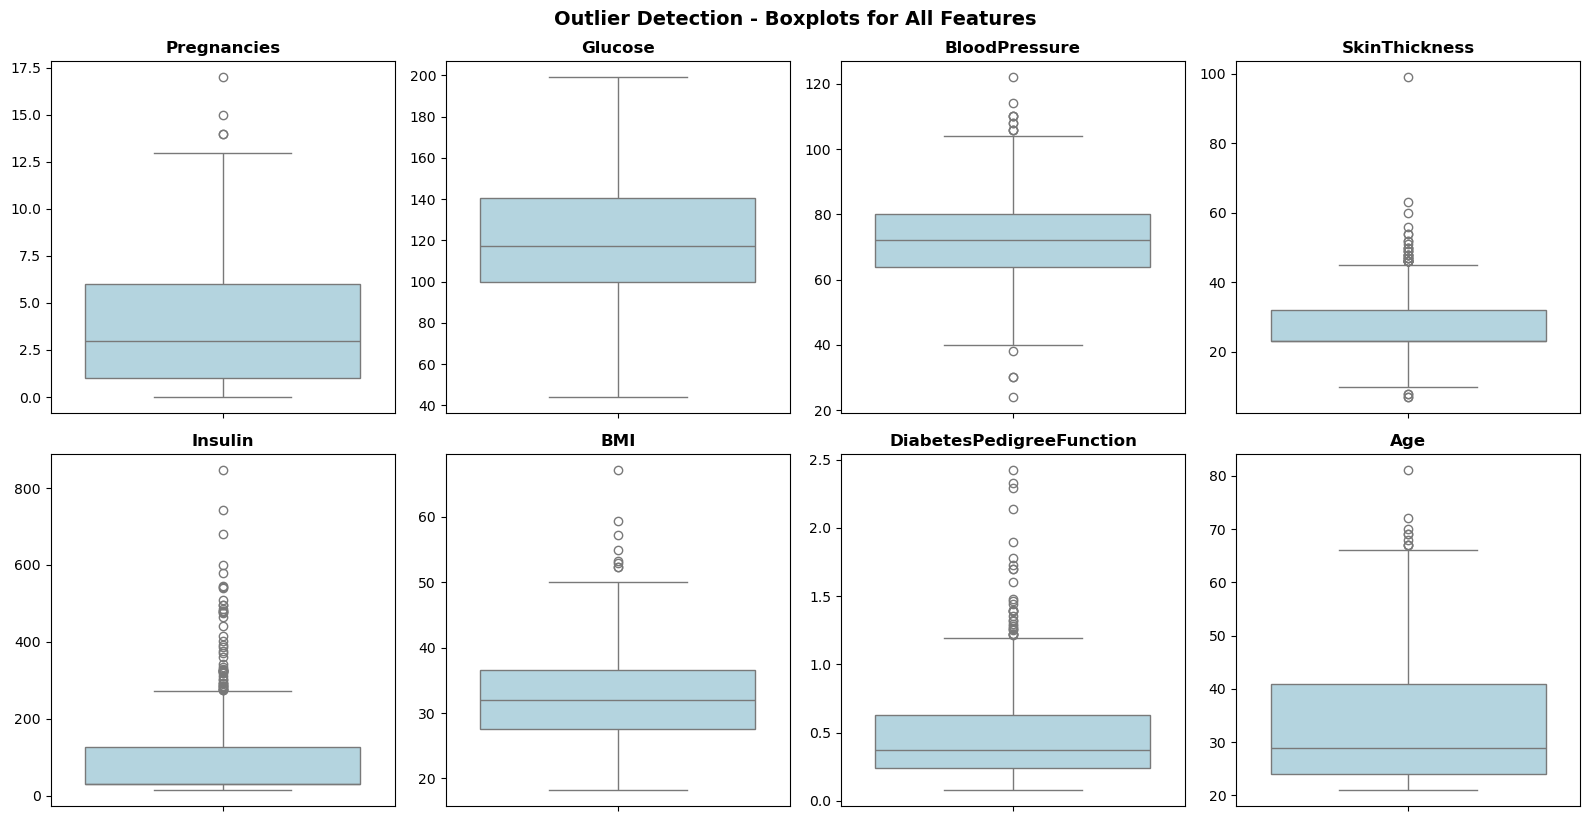

In [58]:
# Visualize outliers using boxplots
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i, col in enumerate(columns_to_check):
    sns.boxplot(y=df[col], ax=axes[i], color='lightblue')
    axes[i].set_title(f'{col}', fontsize=12, fontweight='bold')
    axes[i].set_ylabel('')
    
plt.tight_layout()
plt.suptitle('Outlier Detection - Boxplots for All Features', y=1.02, fontsize=14, fontweight='bold')
plt.show()

In [59]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()  
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
accuracy
cm = confusion_matrix(y_test, y_pred)   
print("Confusion Matrix:\n", cm)
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

Confusion Matrix:
 [[78 21]
 [18 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



c:\Users\abhin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
